### ЛР №1. Вариант 14

### Задание 1
----

1. Сфоримировать выборку случайных величин
$$ Y_i=tg(x_i) $$, где $$ x_i $$ &mdash; равномерно распределенное число из интервала
$$ [0, \pi/4], I=1, ..., n. $$ Величина n задается

$$ y_0=0.5 $$

* Определить параметры равномерного расспределения (елси они не даны в условии задачи в явном виде).
* Сформировать программными средствами равномерно распределенное число $$ \xi_i $$ из интрвала
 $$ [0, 1] $$.
* Преобразовать число $$ \xi_i $$ в число $$ x_i $$, имеющее равномерное распределение из
 интервала $$ [0, \pi/4] $$ по формуле:

$$ X_i = \xi_i (b-a)+a $$

* Получить случайное число


2. Для полученной случайной величины построить вариационный ряд, эмпирическую функцию распределения СВ
$$ Y $$.
 Результаты предоставить в виде таблицы и графика.
3. Найти теоретическую функцию распределения СВ $$ Y $$. Результаты предоставить в виде аналитическом
 виде и в виде графика.

Сравнить полученные результаты, представив графики теоретической и эмпирической функци1 распределения
 в одном окне.

In [108]:
from random import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tabulate import tabulate
%matplotlib inline

In [109]:
a, b = 0, np.pi / 4
n = 10


In [110]:
def get_empirical_points(n):
    variation_series = [np.tan(random() * (b - a) + a) for _ in range(0, n)]
    variation_series = np.around(variation_series, 3)
    variation_series.sort()
    uniq_y = dict(Counter(variation_series))
    frequency = []
    counter = 0
    for k, v in uniq_y.items():
        counter += v
        frequency.append(v)
        uniq_y[k] = counter / n

    y, f = zip(*{**{0: 0}, **uniq_y, **{1.2: 1}}.items())
    return list(y), list(f)

In [111]:
def get_empirical_points_as_table(y, f):
    rows = [['0.0', f'-inf < y <= {y[1]}']]
    for i in range(2, len(y) - 2):
        rows.append([f[i], f'{y[i - 1]} < y <= {y[i]}'])
    rows.append(['1.0', f'{y[-3]} < y <= inf'])

    return tabulate(rows, headers=['F(y)', 'when'], tablefmt='orgtbl')


In [112]:
def theoretical_plot(y, f):
    plt.grid(True, which='both', linestyle='--')
    plt.ylim(-0.01, 1.1)
    plt.xlim(-0.25, 1.2)
    plt.step([-0.25] + y, [0] + f, where='post', label='empiric data')
    y.pop()
    plt.plot(y, [(4 / np.pi) * np.arctan(i) for i in y], label='theoretical data')
    plt.ylabel("F(Y)")
    plt.xlabel("y")
    plt.legend()
    plt.show()

In [113]:
def get_empiric_data(n):
    y, f = get_empirical_points(n)
    plt.grid(True, which='both', linestyle='--')
    plt.ylim(-0.01, 1.1)
    plt.xlim(-0.25, 1.2)
    plt.step([-0.25] + y, [0] + f, where='post', label='empiric data')
    plt.legend()
    plt.show()
    return y, f

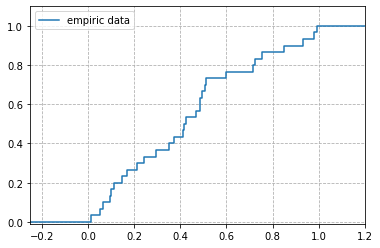

|      F(y) | when               |
|-----------+--------------------|
| 0         | -inf < y <= 0.015  |
| 0.0666667 | 0.015 < y <= 0.054 |
| 0.1       | 0.054 < y <= 0.064 |
| 0.133333  | 0.064 < y <= 0.094 |
| 0.166667  | 0.094 < y <= 0.098 |
| 0.2       | 0.098 < y <= 0.113 |
| 0.233333  | 0.113 < y <= 0.147 |
| 0.266667  | 0.147 < y <= 0.17  |
| 0.3       | 0.17 < y <= 0.213  |
| 0.333333  | 0.213 < y <= 0.245 |
| 0.366667  | 0.245 < y <= 0.296 |
| 0.4       | 0.296 < y <= 0.349 |
| 0.433333  | 0.349 < y <= 0.372 |
| 0.466667  | 0.372 < y <= 0.41  |
| 0.5       | 0.41 < y <= 0.417  |
| 0.533333  | 0.417 < y <= 0.424 |
| 0.566667  | 0.424 < y <= 0.467 |
| 0.6       | 0.467 < y <= 0.484 |
| 0.633333  | 0.484 < y <= 0.487 |
| 0.666667  | 0.487 < y <= 0.494 |
| 0.7       | 0.494 < y <= 0.506 |
| 0.733333  | 0.506 < y <= 0.51  |
| 0.766667  | 0.51 < y <= 0.598  |
| 0.8       | 0.598 < y <= 0.714 |
| 0.833333  | 0.714 < y <= 0.724 |
| 0.866667  | 0.724 < y <= 0.755 |
| 0.9       | 0.755 

In [114]:
y, f = get_empiric_data(30)
print(get_empirical_points_as_table(y, f))


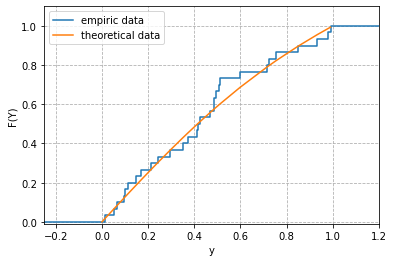

In [115]:
theoretical_plot(y, f)


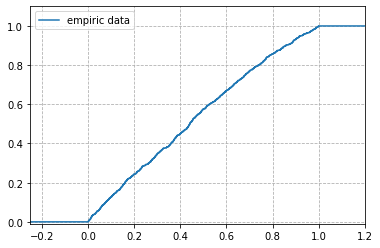

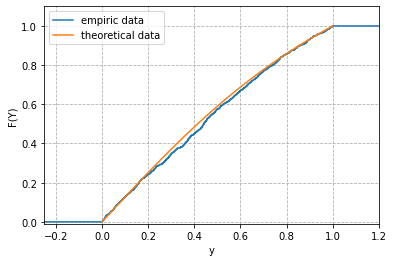

In [116]:
n = 1000
y, f = get_empiric_data(n)
theoretical_plot(y, f)


Глядя на график можно сказать, что для большой выборки эмпирические и теоретические значения почти совпадают
